# Problem Statement

-  The Challenge is for you to develop a machine learning model to predict suspected elder fraud in the digital payments space as described in Rule 4 of the attached Campus Analytics 2021 Challenge Rules document. Your machine learning model (“Solution”) must meet: (a) the Challenge Criteria, (b) follow the Challenge Instructions and Requirements, and (c) incorporate the Key Deliverables, each described in detail below.
- 
Deliverables
Download the attached trainset dataset
Download the attached testset dataset
Download and read the attached Campus Analytics 2021 Challenge Rules document. This contains critical information about challenge deliverables, instructions, suggestions, judging criteria, and winner eligibility.
To Complete a Submission:

# Build a classification model for predicting elder fraud in the digital payments space as described in Rule 4, which:

- Handles missing variables
- Maximizes the F1 score
- Uses the given data set
- Includes suitable encoding schemes
- Has the least set of feature variables
________________________________________________________________________________________________________________________________________

The dataset provided on the Challenge page is synthetic. Conditional GAN (“CTGAN”) was used to generate the synthetic dataset for this Challenge. CTGAN is a neural network model that helps to detect the distributions for the dataset and tries to generate data records with similar distribution compared with the original datasets. It can deal with both continuous and categorical features.

________________________________________________________________________________________________________________________________________

Challenge Instructions and Requirements:

When creating your Solution, you may use a novel combination of existing machine learning and/or statistical methods, or develop your own novel method in order to extract and/or represent thematic information from the data file.

The output needs to include prediction of a target variable. Additionally, your Solution must meet the following requirements:

You must use Python 3.
You must provide citations and sources.

________________________________________________________________________________________________________________________________________


Challenge Suggestions: You may use any clustering, dimensionality reduction, or other algorithm families. Please note that among other criteria, you will be evaluated on whether your selections of methods are appropriate for structured data.

________________________________________________________________________________________________________________________________________

Key Deliverables to Submit:

Deliverable 1: Your results

A table of your results assigning topics to a list of dataset description identifiers in the format shown below.

Very important note: Each solution received should ensure that the dataset_id is present in every record and arranged numerically in the same order as the testset_for_participants.csv file. The solution should also contain a column called ‘FRAUD_NONFRAUD’, which is the predicted class (either FRAUD or NONFRAUD); value of this column needs to be 0 (FRAUD) and 1 (NonFraud). If this is not the case, the submission will be automatically disqualified.






Deliverable 2: Your method

A description of your approach delivered as:

A visual description (flow chart or similar) of the path of the data through your pipeline. Note the areas where your approach is novel.
A few paragraphs describing the rationale behind your method.
Deliverable 3: Your code

Well-commented code that is operational and can be run using the data provided and generating the output of your approach.
An environment configuration file that lists the names and versions of the libraries you used.
NOTE** - You will use the attached "trainset" dataset to build your model. After you have the model, you will run it on the attached "testset_for_participants," produce the scores, and submit them.



# Variable Description:
- TRAN_AMT                           : Transaction Amount 
- ACCT_PRE_TRAN_AVAIL_BAL            : Account Pre Transaction availble before fraud.
- CUST_AGE                           : Customer Age
- OPEN_ACCT_CT                       : Count of open accounts
- WF_dvc_age                         : Wells fargo acocount age (days)
- PWD_UPDT_TS                        : Date and time of password updated
- CARR_NAME                          : Carieer/broadband Company Name 
- RGN_NAME                           : Region
- STATE_PRVNC_TXT                    : State Province Area
- ALERT_TRGR_CD                      : Alert triggered Platform (mobile or Comp)
- DVC_TYPE_TXT                       : Device Type
- AUTHC_PRIM_TYPE_CD                 : Primary Authentication Type (Password, face ID )
- AUTHC_SCNDRY_STAT_TXT              : Secondary Authentication Status text (Allow, Challeneg Success, Challenege                                            Issued, nan)
- CUST_ZIP                           : Customer Zip Code
- CUST_STATE                         : Customer State 
- PH_NUM_UPDT_TS                     : Phone Number Updated Date,time, Seconds 
- CUST_SINCE_DT                      : Customer Since Date 
- TRAN_TS                            : Transaction Date, time , seconds
- TRAN_DT                            : transaction date
- ACTN_CD                            : to be removed
- ACTN_INTNL_TXT                     : To be removed
- TRAN_TYPE_CD                       : to be removed
- ACTVY_DT                           : Activity Date
- FRAUD_NONFRAUD                     : Fraud/Non-Fraud

Important Variables to consider:
1. TRAN_AMT   
2. ACCT_PRE_TRAN_AVAIL_BAL	
3. CUST_AGE	
4. OPEN_ACCT_CT	
5. WF_dvc_age
6. PWD_UPDT_TS
7. RGN_NAME
8. CUST_STATE
9. PH_NUM_UPDT_TS
10. CUST_SINCE_DT
11. ACTVY_DT
12. ALERT_TRGR_CD

In [41]:
train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021,1993-01-06,5/3/2021,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019,1994-02-01,4/8/2021,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019,2001-11-01,8/10/2021,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020,cogent communications,south central,texas,MOBL,...,UT,5/8/2020,1987-02-07,6/27/2021,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


#### STEPS TO DO DATA CLEANING:
- WE HAVE TO FIND THE MISSING VALUES AND REMOVE THOSE ROWS AND COLUMNS.
- Find highly correlated numeric columns.
- perform EDA on the data.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [6]:
train=pd.read_excel("Train Dataset.xlsx") #loading the dataset

In [7]:
train['ACTVY_DT'].unique()

array(['5/3/2021', '1/13/2021', '4/8/2021', '8/10/2021', '6/27/2021',
       '5/18/2021', '1/8/2021', '6/14/2021', '7/4/2021', '3/3/2021',
       '2/16/2021', '3/5/2021', '4/20/2021', '4/17/2021', '1/31/2021',
       '3/2/2021', '1/11/2021', '1/12/2021', '6/17/2021', '2/11/2021',
       '1/4/2021', '7/16/2021', '5/13/2021', '6/9/2021', '4/22/2021',
       '3/18/2021', '5/4/2021', '5/12/2021', '2/1/2021', '7/10/2021',
       '7/21/2021', '2/17/2021', '8/4/2021', '4/2/2021', '6/21/2021',
       '3/1/2021', '2/8/2021', '4/11/2021', '5/8/2021', '3/25/2021',
       '7/22/2021', '1/19/2021', '2/18/2021', '5/6/2021', '3/23/2021',
       '3/19/2021', '1/9/2021', '7/28/2021', '2/3/2021', '7/13/2021',
       '8/20/2021', '7/7/2021', '4/1/2021', '7/5/2021', '2/15/2021',
       '6/24/2021', '2/9/2021', '3/13/2021', '1/6/2021', '7/29/2021',
       '1/29/2021', '7/11/2021', '1/22/2021', '3/26/2021', '2/21/2021',
       '7/19/2021', '3/16/2021', '6/5/2021', '6/22/2021', '4/19/2021',
       '3/9/2021'

In [8]:
train['TRAN_DT'].size

14000

In [9]:
train['TRAN_TS'].unique().size

13500

In [10]:
train['TRAN_TS'].size

14000

In [11]:
train.isnull()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13996,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13998,False,False,False,False,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False


In [40]:
train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021,1993-01-06,5/3/2021,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019,1994-02-01,4/8/2021,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019,2001-11-01,8/10/2021,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020,cogent communications,south central,texas,MOBL,...,UT,5/8/2020,1987-02-07,6/27/2021,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [13]:
train['PH_NUM_UPDT_TS']

0        2/24/2021 15:55:10
1                       NaN
2           5/5/2019 1:8:39
3         2/16/2019 6:45:37
4          5/8/2020 10:27:6
                ...        
13995     7/15/2017 6:58:59
13996                   NaN
13997      5/25/2021 8:50:5
13998                   NaN
13999                   NaN
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object

<AxesSubplot:>

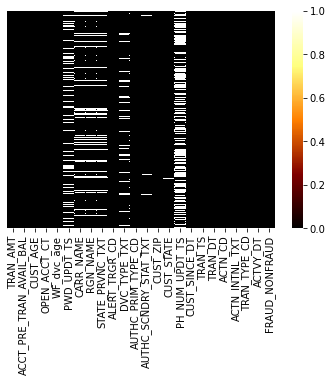

In [14]:
sns.heatmap(train.isnull(),yticklabels=False, cmap="afmhot")
#create a heatmap using seaborn by loding the missing values dataset.
# used to find the missing values

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 14000 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  float64       
 2   CUST_AGE                 14000 non-null  int64         
 3   OPEN_ACCT_CT             14000 non-null  int64         
 4   WF_dvc_age               14000 non-null  int64         
 5   PWD_UPDT_TS              10875 non-null  object        
 6   CARR_NAME                11291 non-null  object        
 7   RGN_NAME                 11291 non-null  object        
 8   STATE_PRVNC_TXT          11291 non-null  object        
 9   ALERT_TRGR_CD            14000 non-null  object        
 10  DVC_TYPE_TXT             12239 non-null  object        
 11  AUTHC_PRIM_TYPE_CD       14000 non-null  object        
 12  AUTHC_SCNDRY_STAT_TXT    13926 n

In [16]:
train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [17]:
train.columns


Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'PWD_UPDT_TS', 'CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD',
       'AUTHC_SCNDRY_STAT_TXT', 'CUST_ZIP', 'CUST_STATE', 'PH_NUM_UPDT_TS',
       'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT', 'FRAUD_NONFRAUD'],
      dtype='object')

In [18]:
#WE HAVE TO FIND THE MISSING VALUES AND REMOVE THOSE ROWS AND COLUMNS.
#Find highly correlated numeric columns.
#perform EDA on the data.


features_NaN = [ features for features in train.columns if train[features].isnull().sum()>=1 ]

features_NaN


['PWD_UPDT_TS',
 'CARR_NAME',
 'RGN_NAME',
 'STATE_PRVNC_TXT',
 'DVC_TYPE_TXT',
 'AUTHC_SCNDRY_STAT_TXT',
 'CUST_STATE',
 'PH_NUM_UPDT_TS']

In [19]:
for features in features_NaN:
    print(features,'-',np.round(train[features].isnull().mean(),4),'% missing values')

PWD_UPDT_TS - 0.2232 % missing values
CARR_NAME - 0.1935 % missing values
RGN_NAME - 0.1935 % missing values
STATE_PRVNC_TXT - 0.1935 % missing values
DVC_TYPE_TXT - 0.1258 % missing values
AUTHC_SCNDRY_STAT_TXT - 0.0053 % missing values
CUST_STATE - 0.0026 % missing values
PH_NUM_UPDT_TS - 0.5044 % missing values


In [20]:
# Finding the realtionship btw missing values and dependent variable
#only numeric data can be used

In [21]:
for features in features_NaN:
    data=train.copy()
    data[features]=np.where(data[features].isnull(),1,0)
    data.groupby(features) ['FRAUD_NONFRAUD'].plot.bar()
    plt.title(features)
    plt.ylabel('FRAUD AND NONFRAUD').median().plot.bar()
    plt.show()

TypeError: no numeric data to plot

In [ ]:
#Chi-Square test to know the strength between NaN values and target variable

for features in features_NaN:
    data=train.copy()
    data[features]=np.where(data[features].isnull(),1,0)
    crosstabresult= pd.crosstab( index= data[features], columns= train['FRAUD_NONFRAUD']  )
    print(crosstabresult)
    chisquareresult= chi2_contingency(crosstabresult)
    print("The chi squre test of this cross tab is:", chisquareresult[1])
#we have to calculate the chi square test for the cross tab result 
#and if the p value of that test is >0.05, we consider the null hypothesis is true(which is the columns are not correlated)

In [ ]:
print(crosstabresult)

In [ ]:
from scipy.stats import chi2_contingency
for crosstabs in crosstabresult:
    print(crosstabs)
    #chisquareresult= chi2_contingency(crosstabs)
    #print(chisquareresult)

In [ ]:
crosstabresult.size

In [ ]:
df['Dates'] = pd.to_datetime(df['date']).dt.date

Report(9/29/2021):
- Career name , region name and state province are highly corrrelated with the target variable among the columns with null values. 
- This implies that, those three columns should never be removed and to be dealt with missing values.

In [ ]:
train.head()

## Donot run this cell again

In [23]:
train['PWD_UPDT_TS'] = train['PWD_UPDT_TS'].str.split().str[0]

train['TRAN_TS'] = train['TRAN_TS'].str.split().str[0]



#time stamp removed

In [27]:
train['PH_NUM_UPDT_TS'] = train['TRAN_TS'].str.split().str[0]

In [28]:
train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021,1993-01-06,5/3/2021,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019,1994-02-01,4/8/2021,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019,2001-11-01,8/10/2021,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020,cogent communications,south central,texas,MOBL,...,UT,5/8/2020,1987-02-07,6/27/2021,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [47]:
HAC_Clustering= train[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','OPEN_ACCT_CT','WF_dvc_age']]
HAC_Clustering

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age
0,5.38,23619.91,47,4,2777
1,65.19,0.00,45,5,2721
2,54.84,34570.63,36,8,1531
3,0.01,0.00,62,3,835
4,497.08,12725.18,81,2,1095
...,...,...,...,...,...
13995,1937.21,230.75,55,4,142
13996,114.38,0.00,44,10,272
13997,493.00,2848.63,54,3,517
13998,491.64,3163.25,21,3,0


In [50]:
import scipy.cluster.hierarchy as hac

In [52]:
z= hac.linkage( HAC_Clustering, method= 'single' )

z

array([[1.33080000e+04, 1.35320000e+04, 0.00000000e+00, 2.00000000e+00],
       [6.64800000e+03, 1.09670000e+04, 0.00000000e+00, 2.00000000e+00],
       [6.66600000e+03, 1.34810000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.79920000e+04, 2.79950000e+04, 5.40303383e+03, 1.39960000e+04],
       [2.79670000e+04, 2.79960000e+04, 1.10789582e+04, 1.39980000e+04],
       [2.79730000e+04, 2.79970000e+04, 2.93258791e+04, 1.40000000e+04]])

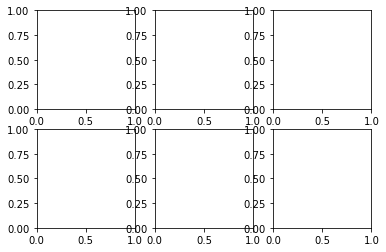

AttributeError: 'DataFrame' object has no attribute 'scatter'

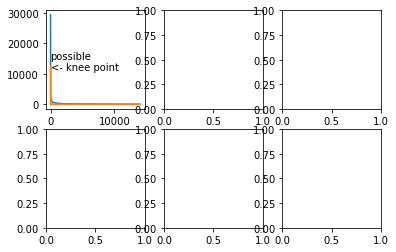

In [60]:
fig, axes23 = plt.subplots(2, 3)
for method, axes in zip(['single', 'complete'], axes23):
    z = hac.linkage(HAC_Clustering, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            HAC_Clustering.scatter(HAC_Clustering[part == cluster, 0], HAC_Clustering[part == cluster, 1], 
                       color=clr[cluster])

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()

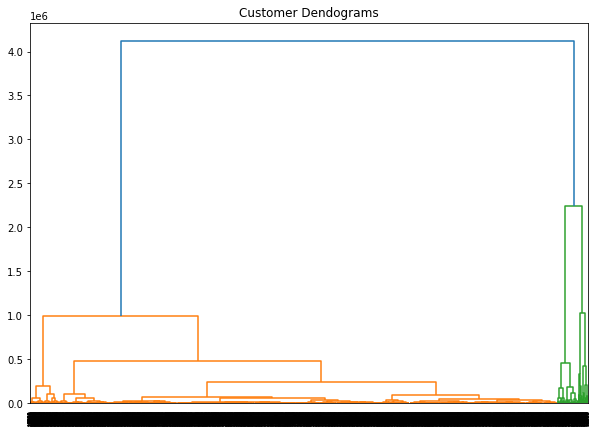

In [62]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(HAC_Clustering, method='ward'))
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#cluster.fit_predict(X)

In [63]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

#draw a horizontal line that passes through longest distance without a horizontal line
#check the number of times it cuts then put "n" as that value

cluster.fit_predict(HAC_Clustering)

array([4, 0, 4, ..., 0, 0, 0], dtype=int64)

In [71]:
# Scaling the data so that all the features become comparable

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

scaler = StandardScaler()
HAC_Clustering_scaled = scaler.fit_transform(HAC_Clustering)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
HAC_Clustering_normalized = normalize(HAC_Clustering_scaled)
  
# Converting the numpy array into a pandas DataFrame
HAC_Clustering_normalized = pd.DataFrame(HAC_Clustering_normalized)

,0,1,2,3,4
0,-0.248806,0.130860,-0.107924,-0.086230,0.949678
1,-0.201323,-0.103974,-0.144518,-0.056018,0.961580
2,-0.348365,0.407810,-0.478344,0.073902,0.691417
3,-0.752116,-0.296490,0.371784,-0.351422,0.291025
4,0.381098,0.045442,0.785366,-0.281486,0.395809
...,...,...,...,...,...
13995,0.987537,-0.063052,0.010662,-0.055606,-0.132625
13996,-0.495540,-0.334116,-0.516366,0.360008,-0.496555
13997,0.810725,-0.291824,0.003949,-0.479322,-0.166729
13998,0.317936,-0.110255,-0.817483,-0.189154,-0.427438


In [29]:
train.iloc[1:3, 0:3]

AttributeError: 'DataFrame' object has no attribute 'Class'